In [1]:
# Library & Packages
import pandas as pd
import numpy as np
import random

from datetime import datetime, timedelta

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Reproducibility
np.random.seed(42)
random.seed(42)

In [2]:
# Patient demographic 

# Number of appointments
n = 10000

# Age groups
age_groups = ["0-5", "6-12", "13-18", "19-21"]
age_group_probs = [0.30, 0.35, 0.25, 0.10]  # Check Ohio and NCH for better prob

In [3]:
# NCH outpatient clinic locations
clinic_locations = [
    "Livingston Ambulatory Center",
    "Close-to-Home Center – East Columbus",
    "Close-to-Home Center – Dublin",
    "Close-to-Home Center – Westerville",
    "Downtown Primary Care",
    "Hilliard Specialty Care",
]

# Specialty types & specialties
specialty_map = {
    "Primary Care": ["Primary Care"],
    "Specialty Clinic": [
        "Cardiology", "Endocrinology", "Neurology",
        "Dermatology", "Orthopedics", "Sports Medicine",
        "Gastroenterology", "Pulmonology"
    ],
    "Therapy": ["Physical Therapy", "Occupational Therapy", "Speech Therapy"],
    "Behavioral Health": ["Psychology", "Psychiatry", "Developmental Pediatrics"],
    "Urgent Care": ["Urgent Care"]
}

specialty_types = list(specialty_map.keys())
specialty_type_probs = [0.30, 0.40, 0.10, 0.10, 0.10]   # approximate proportions
                                                        # 30% Primary care
                                                        # 40% Specialty clinics
                                                        # 3 * 10% Therapy
                                                        # 10% ER
                                                        
# Providers
providers = [
    "Dr. A", "Dr. B", "Dr. C", "Dr. E", "Dr. F",
    "NP. H", "Dr. I", "Dr. J", "Dr. K"
]

# Appointment types
appointment_types = [
    "Well-child / Preventive", "New Concern", "Follow-up",
    "Therapy Session", "Behavioral Health Visit", "Urgent / Sick"
]


# Status distributions (slightly different depending on specialty)
status_options = ["Completed", "No-show", "Cancelled by Patient", "Cancelled by Clinic"]
status_probs = [0.78, 0.10, 0.10, 0.02] 

In [4]:
# Generate appointment dates
start_date = datetime(2024, 1, 1)
appointment_dates = [
    start_date + timedelta(days=int(np.random.exponential(scale=45)))
    for _ in range(n)
]

# Scheduled dates walk ins will have scheduled_date = None <- Needs to be fixed for no show!
scheduled_dates = []
is_walk_in = []

for d in appointment_dates:
    if np.random.rand() < 0.15:  # 15% walk in rate
        scheduled_dates.append(None)
        is_walk_in.append(True)
    else:
        scheduled_dates.append(d - timedelta(days=np.random.randint(3, 45)))
        is_walk_in.append(False)

In [5]:
# Building the dataset
rows = []

for i in range(n):
    age_group = np.random.choice(age_groups, p=age_group_probs)
    location = np.random.choice(clinic_locations)
    specialty_type = np.random.choice(specialty_types, p=specialty_type_probs)
    specialty = np.random.choice(specialty_map[specialty_type])
    provider = np.random.choice(providers)

    # Appointment type distribution varies by specialty type
    if specialty_type == "Therapy":
        appt_type = "Therapy Session"
    elif specialty_type == "Behavioral Health":
        appt_type = "Behavioral Health Visit"
    elif specialty_type == "Urgent Care":
        appt_type = "Urgent / Sick"
    else:
        appt_type = np.random.choice(appointment_types)

    # Status
    status = np.random.choice(status_options, p=status_probs)

    # Visit length only for completed visits
    visit_length = (
        np.random.normal(25, 8)
        if status == "Completed"
        else None
    )
    if visit_length is not None:
        visit_length = int(max(10, min(90, visit_length)))  # constrain to realistic range

    provider_hours = round(np.random.normal(8, 1.2), 2)
    provider_hours = max(4, min(12, provider_hours))

    row = {
        "patient_id": 10000 + i,
        "age_group": age_group,
        "clinic_location": location,
        "specialty_type": specialty_type,
        "specialty": specialty,
        "provider": provider,
        "appointment_type": appt_type,
        "scheduled_date": scheduled_dates[i],
        "appointment_date": appointment_dates[i],
        "status": status,
        "visit_length_min": visit_length,
        "provider_hours_worked": provider_hours,
        "is_walk_in": is_walk_in[i]
    }

    rows.append(row)

df = pd.DataFrame(rows)

In [27]:
# Save to CSV
!pwd
file_name = "NCH_ambulatory_appointments.csv"
df.to_csv(file_name, index=False)

print(f"Generated file: {file_name}")
print(df.head())

/Users/ahmad/Desktop/job_hunt/2025/NCH
Generated file: NCH_ambulatory_appointments.csv
   patient_id age_group                     clinic_location  \
0       10000      6-12        Livingston Ambulatory Center   
1       10001       0-5  Close-to-Home Center – Westerville   
2       10002       0-5             Hilliard Specialty Care   
3       10003     19-21               Downtown Primary Care   
4       10004     19-21  Close-to-Home Center – Westerville   

      specialty_type                 specialty provider  \
0   Specialty Clinic               Orthopedics    Dr. E   
1   Specialty Clinic               Dermatology    Dr. B   
2       Primary Care              Primary Care    Dr. A   
3  Behavioral Health  Developmental Pediatrics    Dr. J   
4        Urgent Care               Urgent Care    Dr. A   

          appointment_type scheduled_date appointment_date     status  \
0  Well-child / Preventive     2023-12-15       2024-01-22  Completed   
1                Follow-up     20

In [7]:
df.sample(20)

,patient_id,age_group,clinic_location,specialty_type,specialty,provider,appointment_type,scheduled_date,appointment_date,status,visit_length_min,provider_hours_worked,is_walk_in
7042,17042,6-12,Close-to-Home Center – Westerville,Urgent Care,Urgent Care,Dr. K,Urgent / Sick,2024-01-22,2024-02-16,Completed,37.0,7.07,False
7811,17811,6-12,Downtown Primary Care,Specialty Clinic,Cardiology,Dr. C,Behavioral Health Visit,2023-11-28,2024-01-03,Completed,16.0,9.00,False
4191,14191,13-18,Close-to-Home Center – Dublin,Urgent Care,Urgent Care,Dr. I,Urgent / Sick,2024-03-05,2024-04-02,No-show,NaN,8.72,False
7563,17563,13-18,Hilliard Specialty Care,Urgent Care,Urgent Care,Dr. B,Urgent / Sick,2024-02-10,2024-02-27,Completed,19.0,6.69,False
4150,14150,6-12,Livingston Ambulatory Center,Urgent Care,Urgent Care,Dr. J,Urgent / Sick,2023-12-05,2024-01-06,Cancelled by Patient,NaN,8.94,False
6391,16391,6-12,Downtown Primary Care,Primary Care,Primary Care,Dr. A,Well-child / Preventive,2023-12-17,2024-01-25,Completed,23.0,9.61,False
1385,11385,6-12,Hilliard Specialty Care,Specialty Clinic,Orthopedics,Dr. J,Behavioral Health Visit,2023-12-24,2024-01-18,Completed,21.0,9.84,False
6184,16184,6-12,Close-to-Home Center – Westerville,Specialty Clinic,Cardiology,Dr. K,New Concern,NaT,2024-01-02,No-show,NaN,7.91,True
3027,13027,6-12,Downtown Primary Care,Primary Care,Primary Care,Dr. F,Behavioral Health Visit,2024-02-13,2024-02-16,Cancelled by Clinic,NaN,9.34,False
1090,11090,6-12,Close-to-Home Center – East Columbus,Specialty Clinic,Endocrinology,Dr. K,Urgent / Sick,2024-04-07,2024-05-08,Completed,29.0,8.15,False


(array([ 975.,  816.,  843.,  841.,  810.,  819.,  817.,  784.,  800.,
        1081.]),
 array([ 3. ,  7.1, 11.2, 15.3, 19.4, 23.5, 27.6, 31.7, 35.8, 39.9, 44. ]),
 <BarContainer object of 10 artists>)

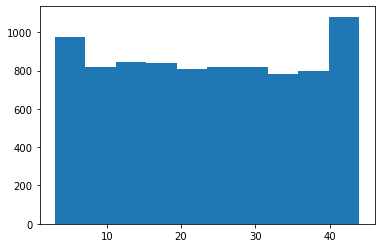

In [8]:
scheduled_df  = df[df['is_walk_in'] == False]
scheduled_df.describe()
wait_period = scheduled_df['appointment_date'] - scheduled_df['scheduled_date']
plt.hist(wait_period.dt.days)

In [9]:
# Wait time stats

# Convert to datetime
df["appointment_date"] = pd.to_datetime(df["appointment_date"])
df["request_date"] = pd.to_datetime(df["scheduled_date"])

# Calculate waiting period in days
df["wait_days"] = (df["appointment_date"] - df["scheduled_date"]).dt.days

# Summary: average wait time per department
wait_by_dept = df.groupby("specialty")["wait_days"].agg(["count", "mean", "median", "min", "max"]).reset_index()

print(wait_by_dept)


                   specialty  count       mean  median  min   max
0                 Cardiology    422  22.338863    22.0  3.0  44.0
1                Dermatology    446  23.775785    24.0  3.0  44.0
2   Developmental Pediatrics    292  24.332192    24.0  3.0  44.0
3              Endocrinology    416  23.389423    23.5  3.0  44.0
4           Gastroenterology    436  23.529817    23.0  3.0  44.0
5                  Neurology    426  23.974178    24.0  3.0  44.0
6       Occupational Therapy    275  23.363636    25.0  3.0  44.0
7                Orthopedics    415  24.253012    25.0  3.0  44.0
8           Physical Therapy    290  23.651724    24.0  3.0  44.0
9               Primary Care   2555  23.833659    24.0  3.0  44.0
10                Psychiatry    310  22.506452    21.0  3.0  44.0
11                Psychology    298  23.711409    23.0  3.0  44.0
12               Pulmonology    463  23.539957    24.0  3.0  44.0
13            Speech Therapy    298  22.758389    23.0  3.0  44.0
14        

In [10]:
df["wait_days"]

0       38.0
1       16.0
2       21.0
3       11.0
4       21.0
        ... 
9995    14.0
9996    18.0
9997    40.0
9998     4.0
9999    10.0
Name: wait_days, Length: 10000, dtype: float64

In [11]:
departments = df["specialty"].unique()
departments

array(['Orthopedics', 'Dermatology', 'Primary Care',
       'Developmental Pediatrics', 'Urgent Care', 'Sports Medicine',
       'Speech Therapy', 'Physical Therapy', 'Pulmonology',
       'Endocrinology', 'Neurology', 'Gastroenterology', 'Cardiology',
       'Psychology', 'Psychiatry', 'Occupational Therapy'], dtype=object)

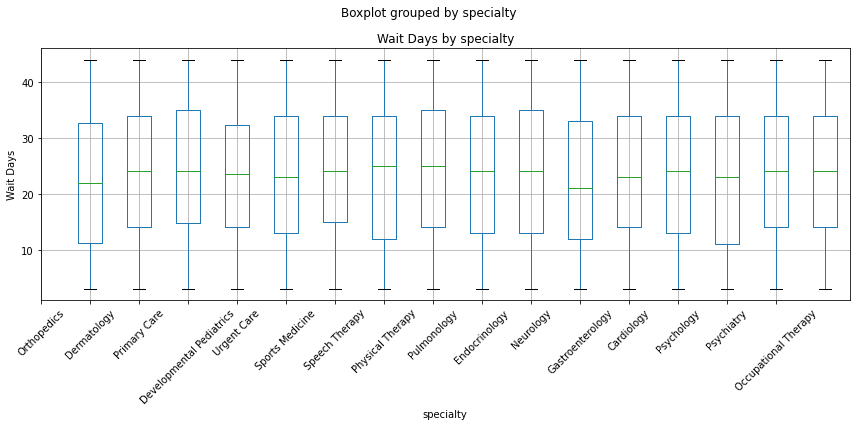

In [12]:
# df["appointment_date"] = pd.to_datetime(df["appointment_date"])
# df["scheduled_date"] = pd.to_datetime(df["scheduled_date"])


# df["wait_days"] = (df["appointment_date"] - df["scheduled_date"]).dt.days

# Get list of departments
departments = df["specialty"].unique()


# Creating boxplot
df.boxplot(column = 'wait_days', by='specialty',figsize=(12, 6))
plt.xticks(range(len(departments)), departments, rotation=45)
plt.ylabel("Wait Days")
plt.title("Wait Days by specialty")
plt.tight_layout()
plt.show()

/var/folders/zj/q0xh2hks24j1mmgrtbf3m6q80000gn/T/ipykernel_26045/795767893.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


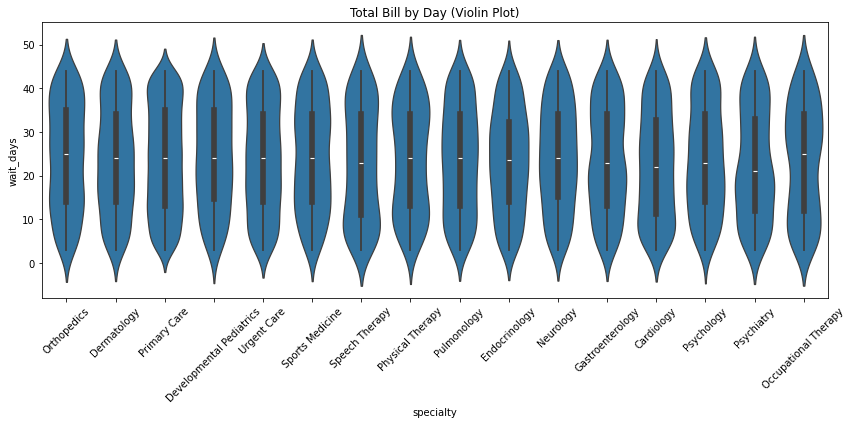

In [13]:
# plt.figure(figsize=(12, 6))
# sns.violinplot(x=df["specialty"], y=df["wait_days"], data=df)
# plt.title('Violin Plot of Total Bill by Day')
# plt.xlabel(rotation=45, ha='right')
# plt.show()

plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=df, x="specialty", y="wait_days")#,density_norm="count")#
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Total Bill by Day (Violin Plot)")

plt.tight_layout() 
plt.show()

(array([ 975.,  816.,  843.,  841.,  810.,  819.,  817.,  784.,  800.,
        1081.]),
 array([ 3. ,  7.1, 11.2, 15.3, 19.4, 23.5, 27.6, 31.7, 35.8, 39.9, 44. ]),
 <BarContainer object of 10 artists>)

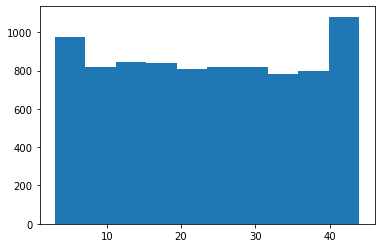

In [14]:
plt.hist(df['wait_days'])

In [15]:
df['within_14'] = df['wait_days'] <= 14
specialty_summary = df.groupby('specialty').agg(
    pct_within_14=('within_14','mean'),
    avg_wait=('wait_days','mean'),
    median_wait=('wait_days','median'),
    count=('wait_days','count')
).reset_index()
specialty_summary['pct_within_14'] *= 100

In [16]:
specialty_summary

,specialty,pct_within_14,avg_wait,median_wait,count
0,Cardiology,27.016129,22.338863,22.0,422
1,Dermatology,22.692308,23.775785,24.0,446
2,Developmental Pediatrics,20.505618,24.332192,24.0,292
3,Endocrinology,22.606925,23.389423,23.5,416
4,Gastroenterology,23.517787,23.529817,23.0,436
5,Neurology,21.224490,23.974178,24.0,426
6,Occupational Therapy,27.096774,23.363636,25.0,275
7,Orthopedics,23.012552,24.253012,25.0,415
8,Physical Therapy,26.112760,23.651724,24.0,290
9,Primary Care,23.864019,23.833659,24.0,2555


16


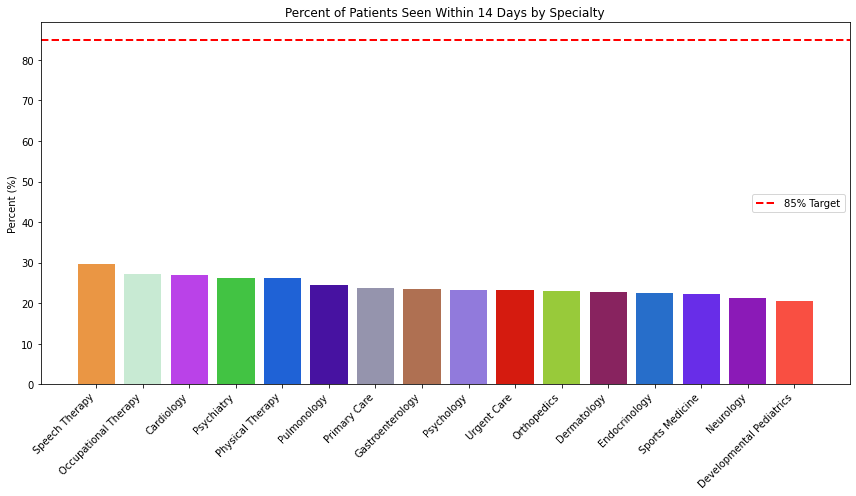

In [17]:
# Target : % seen within 14 days 
df['within_14'] = df['wait_days'] <= 14

specialty_summary = df.groupby('specialty').agg(
    pct_within_14=('within_14', 'mean')
).reset_index()

specialty_summary['pct_within_14'] *= 100

# Rank departments 
specialty_summary = specialty_summary.sort_values("pct_within_14", ascending=False)
print(len(specialty_summary))

np.random.seed(314)
plt.figure(figsize=(12, 7))
colors = np.random.rand(len(specialty_summary), 3)  
plt.bar(specialty_summary['specialty'], specialty_summary['pct_within_14'], color=colors)

plt.axhline(85, linestyle="--", linewidth=2, color="red", label="85% Target")


plt.title("Percent of Patients Seen Within 14 Days by Specialty")
plt.ylabel("Percent (%)")
plt.xticks(rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 864x504 with 0 Axes>

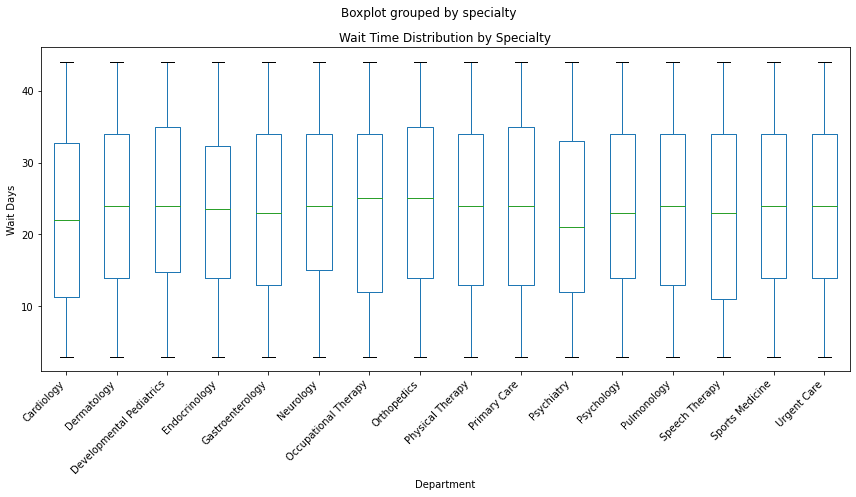

In [18]:
# departments = df['specialty'].unique()
# departments.sort()

plt.figure(figsize=(12, 7))


df.boxplot(
    column='wait_days', 
    by='specialty',
    grid=False,
    figsize=(12, 7)
)

plt.title("Wait Time Distribution by Specialty")
plt.xlabel("Department")
plt.ylabel("Wait Days")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [19]:
df['within_14'] = df['wait_days'] <= 14

df['no_show_flag'] = df['status'] == "No-show"

df['cancel_flag'] = df['status'].isin([
    "Cancelled by Patient",
    "Cancelled by Clinic"
])

specialty_table = df.groupby('specialty').agg(
    total_appointments=('specialty', 'count'),
    avg_wait_days=('wait_days', 'mean'),
    median_wait_days=('wait_days', 'median'),
    pct_within_14=('within_14', 'mean'),
    pct_no_show=('no_show_flag', 'mean'),
    pct_cancelled=('cancel_flag', 'mean')
).reset_index()

specialty_table[['pct_within_14', 'pct_no_show', 'pct_cancelled']] *= 100

specialty_table


,specialty,total_appointments,avg_wait_days,median_wait_days,pct_within_14,pct_no_show,pct_cancelled
0,Cardiology,496,22.338863,22.0,27.016129,10.080645,12.500000
1,Dermatology,520,23.775785,24.0,22.692308,10.769231,12.500000
2,Developmental Pediatrics,356,24.332192,24.0,20.505618,7.865169,10.112360
3,Endocrinology,491,23.389423,23.5,22.606925,9.572301,12.423625
4,Gastroenterology,506,23.529817,23.0,23.517787,11.264822,11.462451
5,Neurology,490,23.974178,24.0,21.224490,7.346939,10.612245
6,Occupational Therapy,310,23.363636,25.0,27.096774,11.612903,14.193548
7,Orthopedics,478,24.253012,25.0,23.012552,10.251046,11.715481
8,Physical Therapy,337,23.651724,24.0,26.112760,11.572700,10.682493
9,Primary Care,2971,23.833659,24.0,23.864019,10.131269,12.319084
